# Lead Scoring Case Study - UpGrad July 2023 Batch

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

***Data***

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.***

#### Goals of the Case Study
There are quite a few goals for this case study:

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 
 - here are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding a data

In [2]:
# Loading the dataset
df = pd.read_csv('Leads.csv')

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

## Step 2: Inspecting the dataframe

In [4]:
# Check shape of the data
df.shape

(9240, 37)

In [5]:
# Check Datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check the distribution of numerical varibales using describe 
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 3: Data Prepration

In [7]:
# check null values present in the dataset
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# convert it into percentage
missing_percenatge = df.isnull().mean()*100

In [9]:
missing_percenatge

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

 - as we can see the null percenatge of rach feature there are total 17 feature which are having null values 
 - some features are having very less and some features are having almost 50% of null values
 - now next analyse the each feature and we will decide to impute or drop the feature and make the dataset clean

## Step 4: Data Cleaning

In [10]:
# analysis of prospect id
df["Prospect ID"].value_counts(normalize=True)

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: proportion, Length: 9240, dtype: float64

In [11]:
# the prospect id is not contributing much in analysis need to drop it
df = df.drop("Prospect ID", axis = 1)

In [12]:
# analysis of Lead Number
df["Lead Number"].value_counts(normalize=True)

Lead Number
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: proportion, Length: 9240, dtype: float64

In [13]:
# the Lead Number is not contributing much in analysis need to drop it
df = df.drop("Lead Number", axis = 1)

***Observation***

- Prospect ID & Lead Number are two variables that  indicate the ID number of the People people who have approached and hence they can be dropped.

In [14]:
# Converting 'Select' Values to NaN

df = df.replace('Select', np.nan)

In [15]:
# Check the sum of null values
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
# convert null values into percentage
null_percentages = df.isnull().mean()*100
null_percentages

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

***Observation***
 - as we can observe after replacemnt of 'select' to NaN values the null percenatge has changed 
 - the greater change in 'Lead Profile' feature shows that it has big amount of null values
 - hence we can drop the columns that have null values greater than 40%. 

In [17]:
# Filter columns where missing percentage is greater than the 40
columns_to_drop = null_percentages[null_percentages > 40].index

In [18]:
# Drop columns with null values exceeding the 40
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [20]:
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

***Observation***
 - These are the columns after dropping the null values greater that 40%

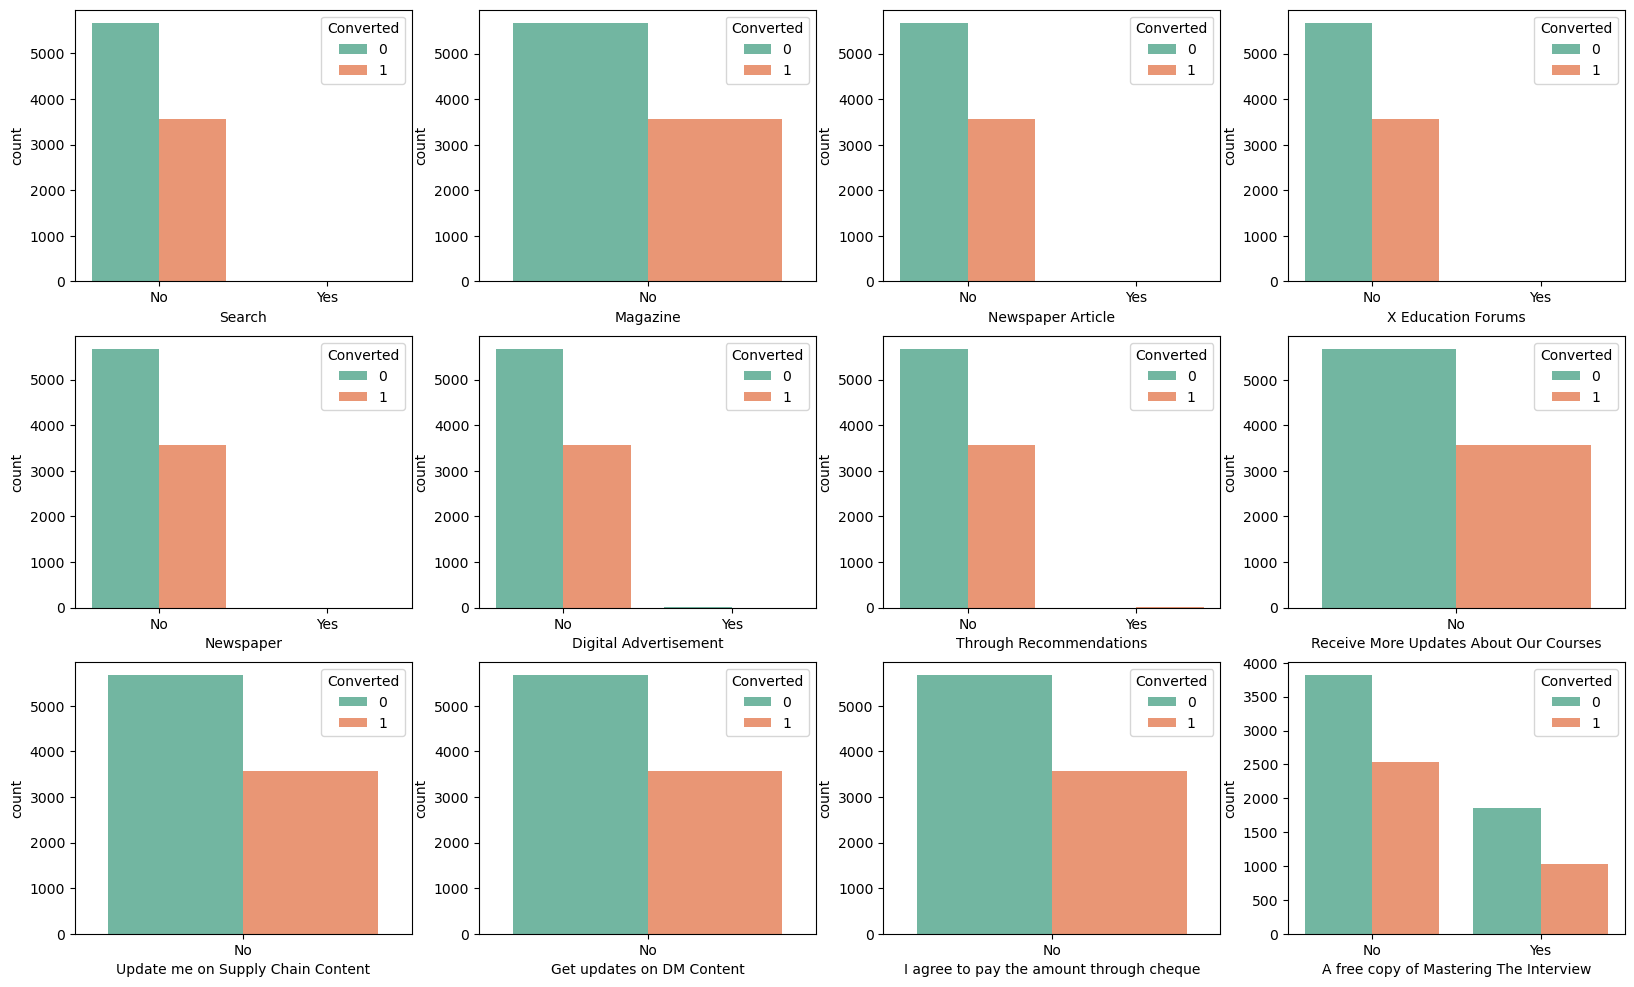

In [21]:
# now we will check the imbalace in the categorical variables along with the target variable
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot( x = 'Search', hue = 'Converted', data = df, ax = axs[0,0],palette = 'Set2')
sns.countplot(data = df, x = 'Magazine', hue = 'Converted', ax = axs[0,1],palette = 'Set2')
sns.countplot(data = df, x = 'Newspaper Article', hue = 'Converted', ax = axs[0,2],palette = 'Set2')
sns.countplot(data = df, x = 'X Education Forums', hue = 'Converted', ax = axs[0,3],palette = 'Set2')
sns.countplot(data = df, x = 'Newspaper', hue = 'Converted', ax = axs[1,0],palette = 'Set2')
sns.countplot(data = df, x = 'Digital Advertisement', hue = 'Converted', ax = axs[1,1],palette = 'Set2')
sns.countplot(data = df, x = 'Through Recommendations', hue = 'Converted', ax = axs[1,2],palette = 'Set2')
sns.countplot(data = df, x = 'Receive More Updates About Our Courses', hue = 'Converted', ax = axs[1,3],palette = 'Set2')
sns.countplot(data = df, x = 'Update me on Supply Chain Content', hue = 'Converted', ax = axs[2,0],palette = 'Set2')
sns.countplot(data = df, x = 'Get updates on DM Content', hue = 'Converted', ax = axs[2,1],palette = 'Set2')
sns.countplot(data = df, x = 'I agree to pay the amount through cheque', hue = 'Converted', ax = axs[2,2],palette = 'Set2')
sns.countplot(data = df, x = 'A free copy of Mastering The Interview', hue = 'Converted', ax = axs[2,3],palette = 'Set2')
plt.show()

***Observation***
- as we can see the data is highly imbalanced hence we decide to drop all the columns except 'A free copy of mastering the interview

In [22]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [23]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
# Dropping the list of columns
df1 = df.drop(cols_to_drop, axis = 1)

In [25]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
# Check the distribution of 'lead_Origin'
df1['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

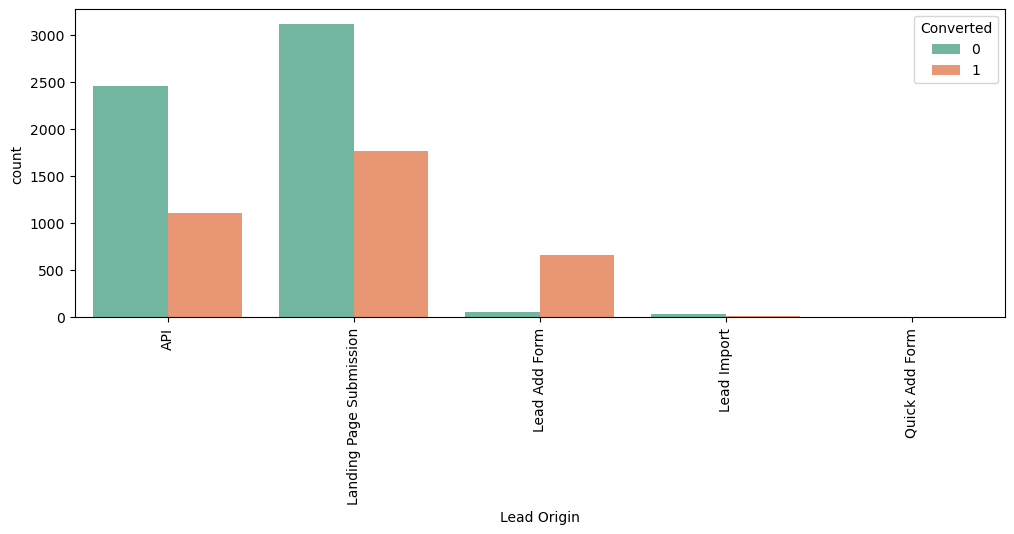

In [27]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

***Observations***
- API and Landing Page Submission gives the higher number of leads along with the conversions.
- Lead Add Form has very high conversion rate where as the count of leads are not very high.
- Lead Import and Quick Add Form give very few leads.
- To improve the overall leads and the conversion rate, we have to improve lead converion of API, Landing Page Submission origin and generate more leads from Lead Add Form.

In [28]:
# Check the distribution of 'lead Source'
df1['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

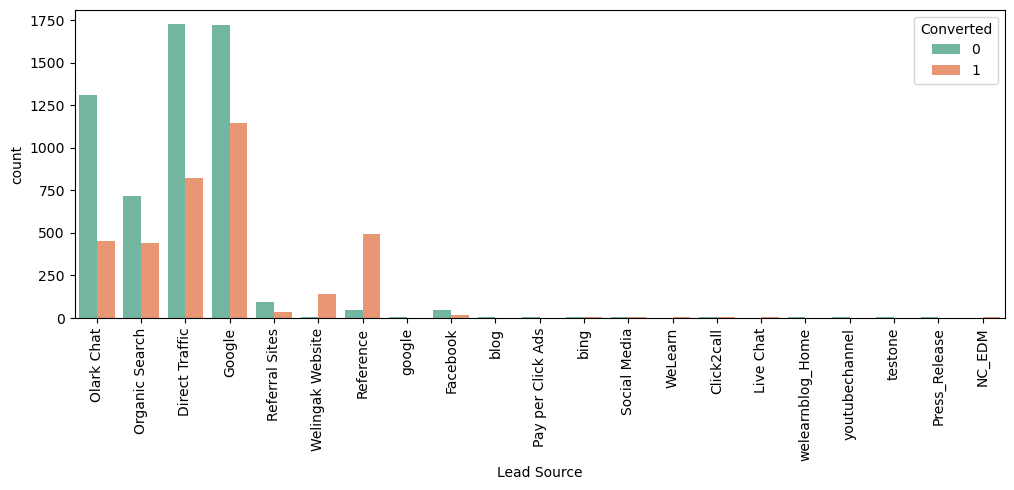

In [29]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

***Observations***
- maximum leads have been generated from Google and Direct Traffic
- we can improve the conversion rate by focusing on 'Olark Chart', 'Organic Search', 'Direct Traffic' and 'Google' and also we can generate more leads from 'Referral Sites', 'Welingak Website', and 'Referance'

<Axes: xlabel='Do Not Email'>

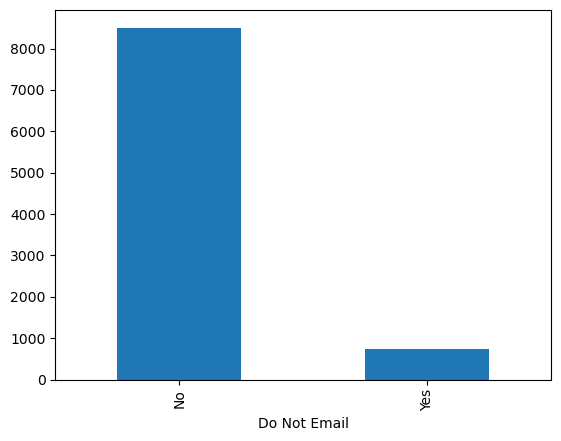

In [30]:
# Check the distribution of 'Do Not Email'
df1['Do Not Email'].value_counts().plot.bar()

<Axes: xlabel='Do Not Call'>

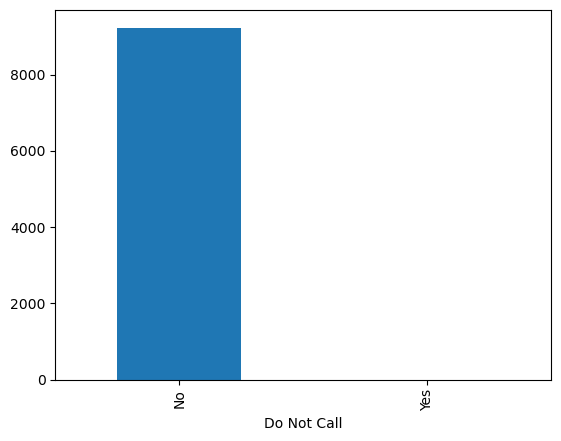

In [31]:
# Check the distribution of 'Do Not Call'
df1['Do Not Call'].value_counts().plot.bar()

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [33]:
# Check the distribution of 'Country'
df1['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

<Axes: xlabel='Country'>

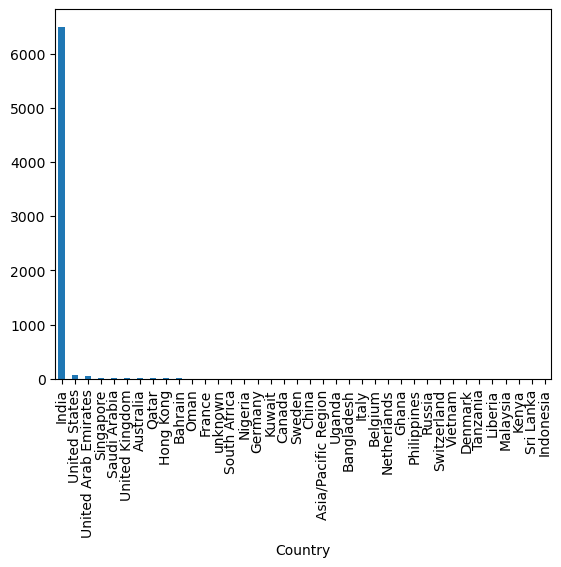

In [34]:
df1['Country'].value_counts().plot.bar()

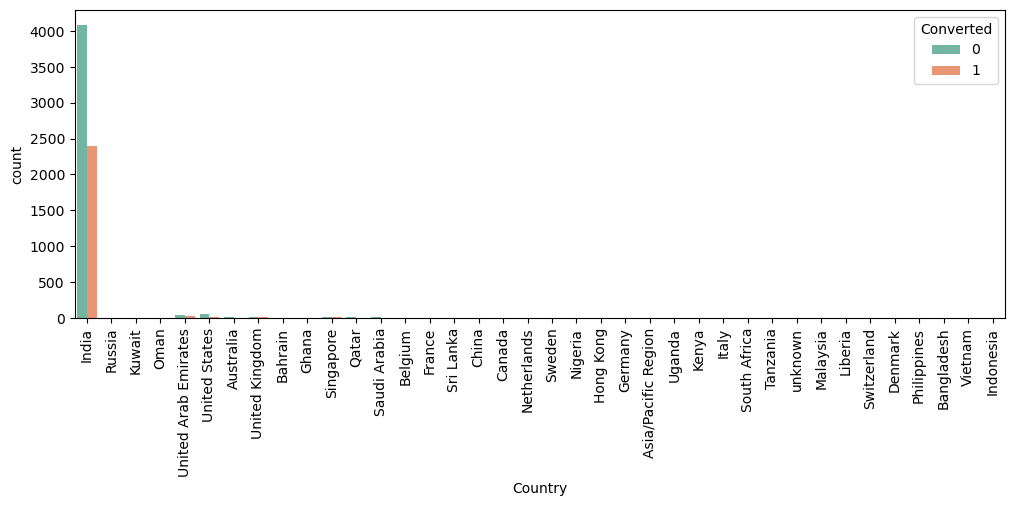

In [35]:
# plot between 'Country' and Target Variable
plt.figure(figsize = (12,4))
sns.countplot(x = 'Country', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='City'>

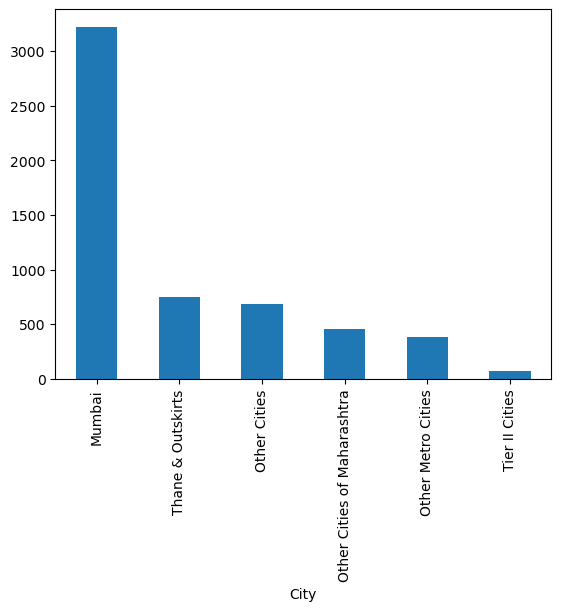

In [36]:
# Check the distribution of 'City'
df1['City'].value_counts().plot.bar()

***Observations***
- As we can see most of the leads are from India and the city column gives us the information about the leads from various cities, Hence we will drop the Country column

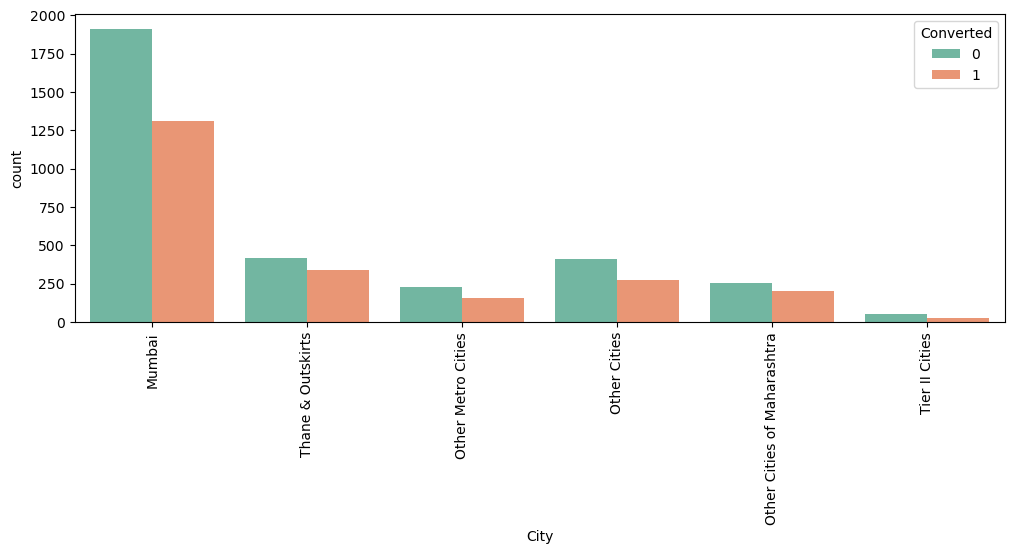

In [37]:
# plot between 'City' and Target Variable
plt.figure(figsize = (12,4))
sns.countplot(x = 'City', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

***Observations***
- The higher number of leads are from Mumbai but the conversion rate is not that high
- Thane and outskirts and other cities have generated leads but comparitively the conversion rate is low.
- other Metro cities and other cities of Maharashtra could generate leads but only few were converted. while the Tier II cities dont have visible conversions

In [38]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# Dropping the irrelevent columns
df1.drop(['Country', 'Do Not Email', 'Do Not Call'], axis=1, inplace=True)

In [40]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

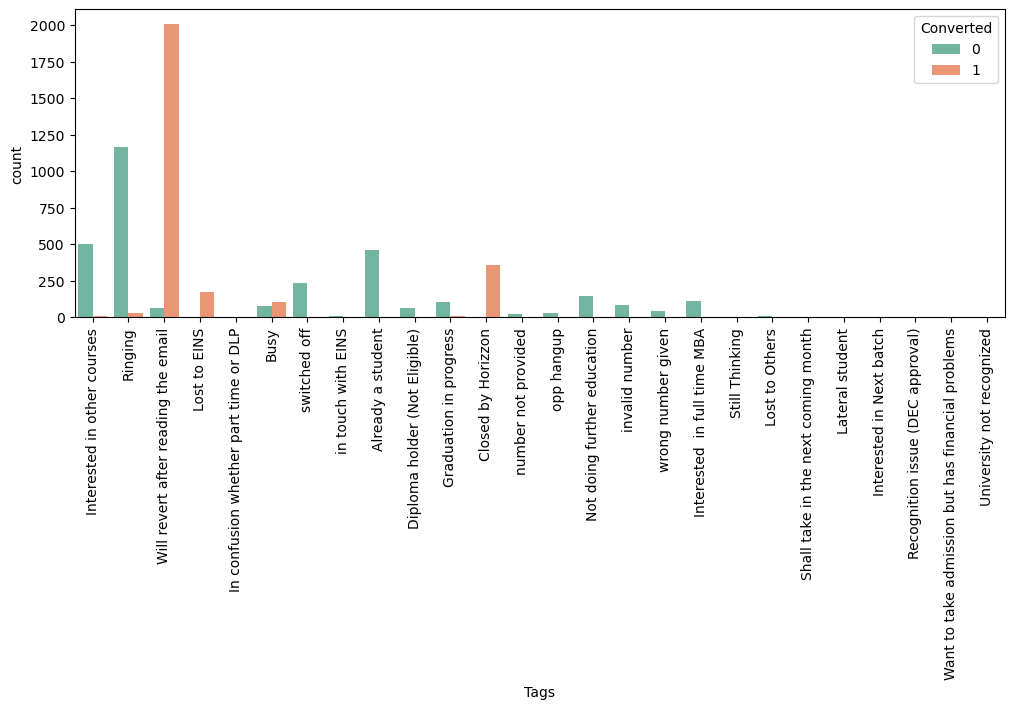

In [41]:
# plot between 'Tags' and Target Variable
plt.figure(figsize = (12,4))
sns.countplot(x = 'Tags', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

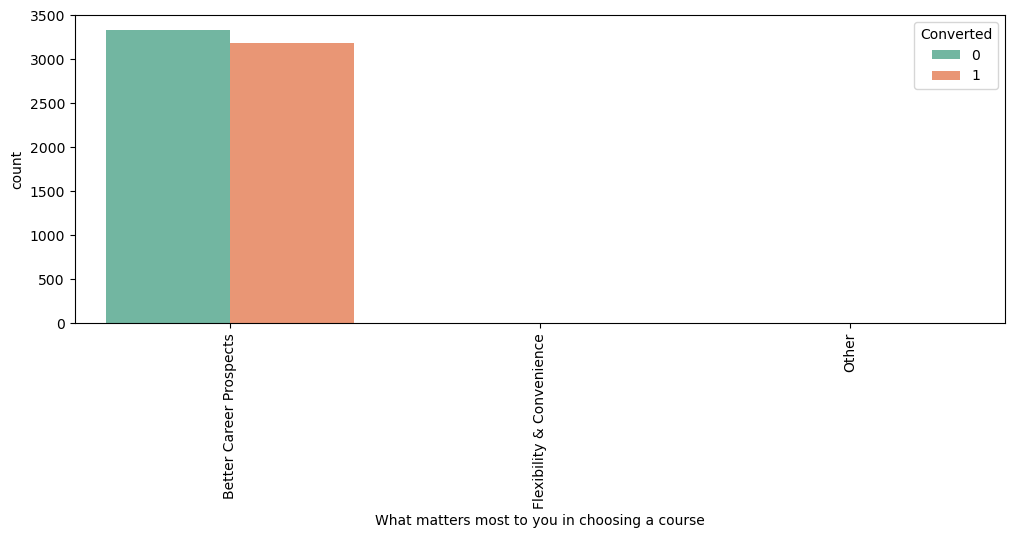

In [42]:
# plot between 'What matters most to you in choosing a course' and Target Variable
plt.figure(figsize = (12,4))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

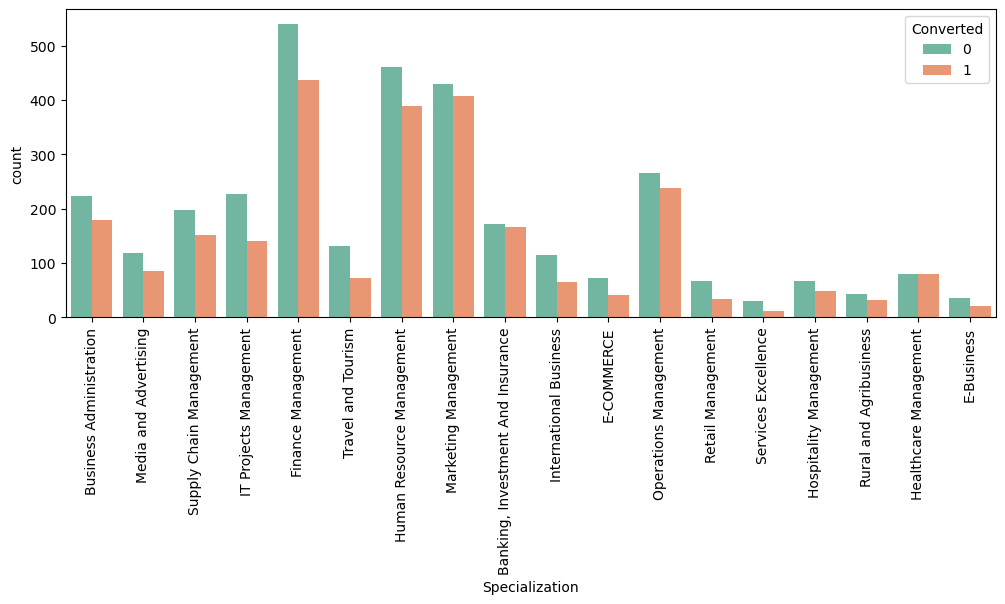

In [43]:
# plot between 'Specialization Column' and Target Variable
plt.figure(figsize = (12,4))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df1, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

***Observations***
- The plot shows that the 'tags' and 'what matters most to you in choosing the course' dont show much revelance related to the conversions of leads, hence we plan to drop the columns

In [44]:
df1.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Dropping above irrelevent columns
df1.drop(['Tags', 'What matters most to you in choosing a course', 'Specialization'], axis=1, inplace=True)

In [46]:
# Check the remaining columns
df1.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# shape of the dataset
df1.shape

(9240, 11)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   What is your current occupation         6550 non-null   object 
 8   City                                    5571 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

### Checking outliers

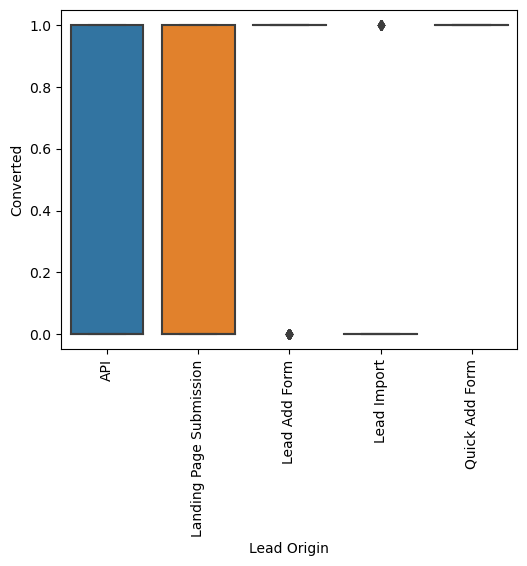

In [49]:
# Box plot for analysing categorical variables to see demands

vars = ['Lead Origin']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

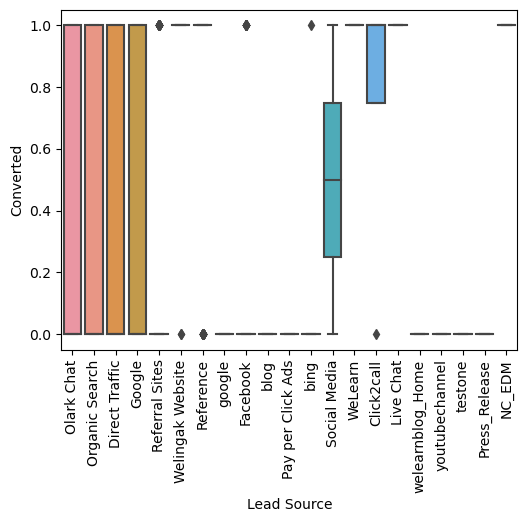

In [50]:
# Box plot for analysing categorical variables to see demands

vars = ['Lead Source']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

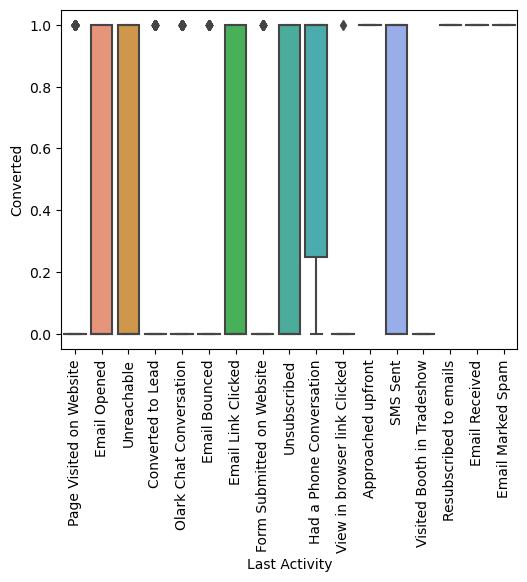

In [51]:
# Box plot for analysing categorical variables to see demands

vars = ['Last Activity']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

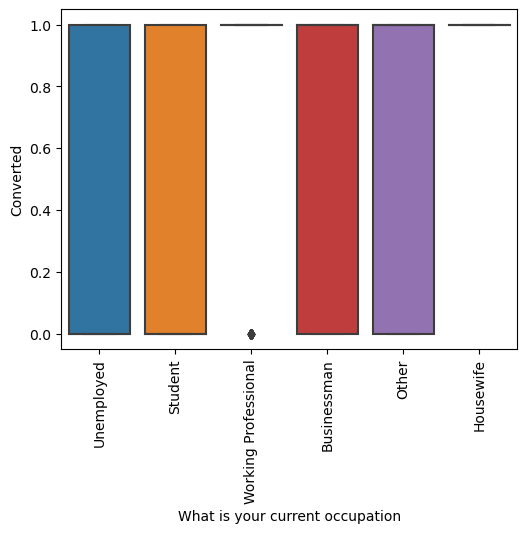

In [52]:
# Box plot for analysing categorical variables to see demands

vars = ['What is your current occupation']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

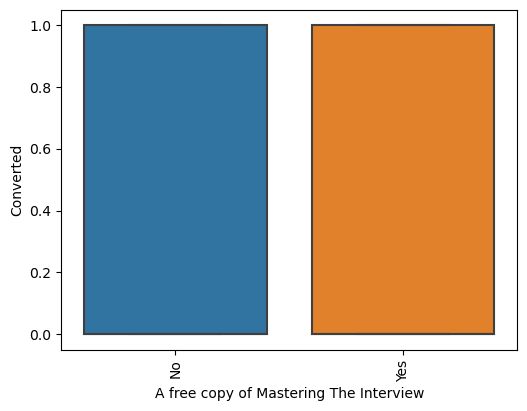

In [53]:
# Box plot for analysing categorical variables to see demands

vars = ['A free copy of Mastering The Interview']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

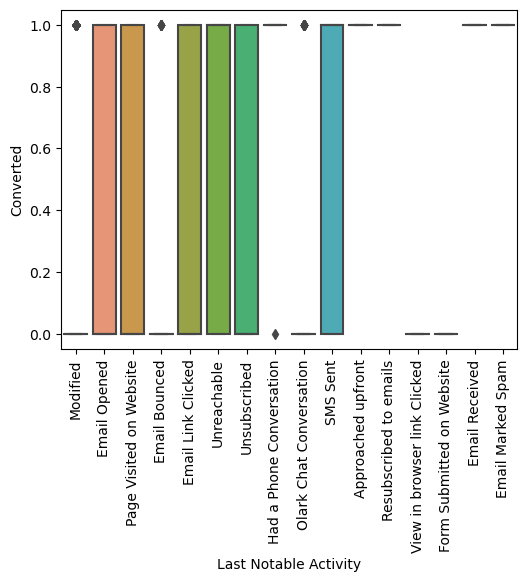

In [54]:
# Box plot for analysing categorical variables to see demands

vars = ['Last Notable Activity']
plt.figure(figsize=(20, 15))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=df1, x=val[1], y='Converted')
plt.show() 

<Axes: ylabel='TotalVisits'>

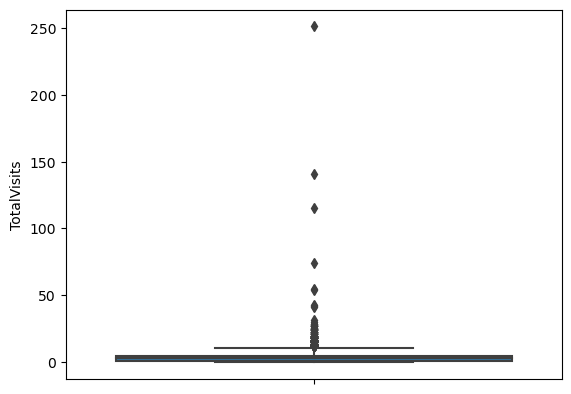

In [55]:
# box plot for checking outliers in TotalVisits
sns.boxplot(y=df1['TotalVisits'])

<Axes: ylabel='Total Time Spent on Website'>

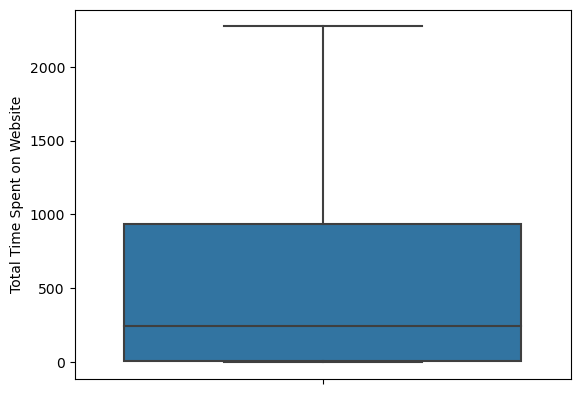

In [56]:
# box plot for checking outliers in Total Time Spent on Website
sns.boxplot(y=df1['Total Time Spent on Website'])

***Observation*** 
 - in this feature we didn't found the outliers

<Axes: ylabel='Page Views Per Visit'>

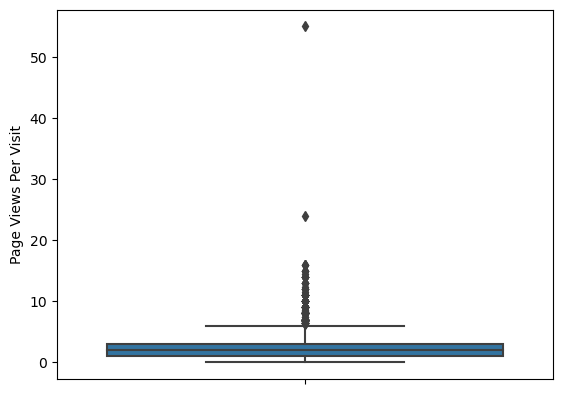

In [57]:
# box plot for checking outliers in Page Views Per Visit
sns.boxplot(y=df1['Page Views Per Visit'])

In [58]:
# Checking for outiers in the continuous variables
continuous_leads = df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [59]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
continuous_leads.describe(percentiles=[.25, .5, .75, .9, .95, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9240.000000           9103.000000
mean      3.445238                   487.698268              2.362820
std       4.854853                   548.021466              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

***Observations***
- Looks like there are no outliers present as per higher percentile levels. The numbers are growing steadily.

#### Outliers Treatment

In [60]:
# Replacing outliers values with IQR values
Q1 = df1['TotalVisits'].quantile(0.25)
Q3 = df1['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
df1=df1.loc[(df1['TotalVisits'] >= Q1 - 1.5*IQR) & (df1['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = df1['Page Views Per Visit'].quantile(0.25)
Q3 = df1['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
df1=df1.loc[(df1['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df1['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

df1.shape

(8542, 11)

<Axes: ylabel='TotalVisits'>

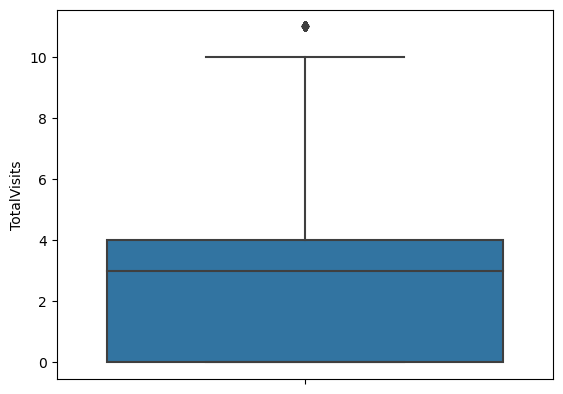

In [61]:
# Plot boxplot of TotalVisits to check outliers
sns.boxplot(y=df1['TotalVisits'])

<Axes: ylabel='Page Views Per Visit'>

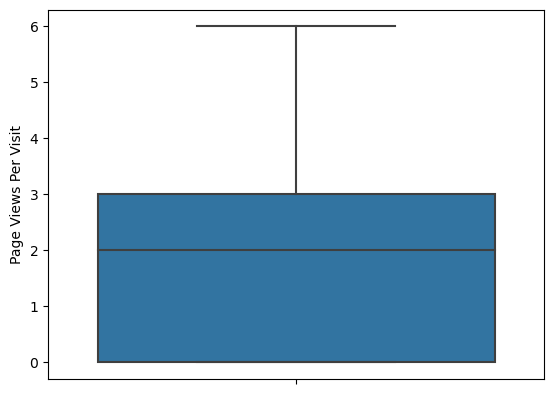

In [62]:
# Plot boxplot of Page Views Per Visit to check outliers
sns.boxplot(y=df1['Page Views Per Visit'])

***Observation***
 - as we can see the outliers are sucessfully trated
 - Now we can see that all the data is in good shape so we can proceed for data preparation

### Impute Null values

In [63]:
df1.isnull().sum()

Lead Origin                                  0
Lead Source                                 29
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
What is your current occupation           2548
City                                      3514
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [64]:
# Replace null values with mode value
df1['Lead Source'].value_counts().mode()

0    1
Name: count, dtype: int64

In [65]:
df1['Lead Source'].fillna(df1['Lead Source'].mode().iloc[0], inplace=True)

In [66]:
df1['What is your current occupation'].fillna(df1['What is your current occupation'].mode().iloc[0], inplace=True)

In [67]:
df1['City'].fillna(df1['City'].mode().iloc[0], inplace=True)

In [68]:
df1.isnull().mean()*100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

***Observation***
- as we can see we impute all the null values present in the variable.

In [69]:
df1.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [70]:
# Check the distribution of A free copy of Mastering The Interview
df1['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     5972
Yes    2570
Name: count, dtype: int64

In [71]:
# Converting some binary variables (Yes/No) to 0/1

# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df1[varlist] = df1[varlist].apply(binary_map)

In [72]:
df1['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
0    5972
1    2570
Name: count, dtype: int64

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8542 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8542 non-null   object 
 1   Lead Source                             8542 non-null   object 
 2   Converted                               8542 non-null   int64  
 3   TotalVisits                             8542 non-null   float64
 4   Total Time Spent on Website             8542 non-null   int64  
 5   Page Views Per Visit                    8542 non-null   float64
 6   Last Activity                           8542 non-null   object 
 7   What is your current occupation         8542 non-null   object 
 8   City                                    8542 non-null   object 
 9   A free copy of Mastering The Interview  8542 non-null   int64  
 10  Last Notable Activity                   8542 non-null   object 
d

In [74]:
#getting a list of categorical columns

cat_cols= df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

### Dummy variable Creation

In [75]:
# Get the dummy variables for the Categorical columns and store it in a new variable - 'Lead'
dummy1 = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Last Notable Activity']], drop_first = True)

In [76]:
# Check the datset dummy
dummy1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                        True                 False   
3                    False                        True                 False   
4                    False                       False                 False   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0               False                  False               False   
1               False                  False               False   
2               False                  False               False   
3               False                  False               False   
4                True                  False               False   

   Lead Source_Olark Chat  Lead Source_Organic Search  ...  \
0                    True                       False  ...   
1                   False                        True  ...   
2                   False                       False  ...   
3                   False                       False  ...   
4                   False                       False  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed  \
0                               False   
1         

In [77]:
dummy1.shape

(8542, 59)

In [78]:
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8542 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   8542 non-null   bool 
 1   Lead Origin_Lead Add Form                             8542 non-null   bool 
 2   Lead Origin_Lead Import                               8542 non-null   bool 
 3   Lead Source_Direct Traffic                            8542 non-null   bool 
 4   Lead Source_Facebook                                  8542 non-null   bool 
 5   Lead Source_Google                                    8542 non-null   bool 
 6   Lead Source_Live Chat                                 8542 non-null   bool 
 7   Lead Source_NC_EDM                                    8542 non-null   bool 
 8   Lead Source_Olark Chat                                8542 non-null   bool 
 9   Le

In [79]:
# Make New dataframe for Numerical Columns
new = df1[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [80]:
# Check the dataset
Lead = pd.concat([new, dummy1], axis=1)
Lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                    False                       False                 False   
1                    False                       False                 False   
2                    False                        True                 False   
3                    False                        True                 False   
4                    False                       False                 False   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0               False  ...                                            False   
1               False  ...                                            False   
2               False  ...                                            False   
3               False  ...                                            False   
4                True  ...                                            False   

   Last Notable Activity_Had a Phone Conversation  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Last Notable Activity_Modified  \
0                            True   
1                           False   
2                           False   
3                            True   
4                            True   

   Last Notable Activity_Olark Chat Conversation  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Page Visited on Website  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Last Notable Activity_Resubscribed to emails  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                           False                              False   
1                           False                              False   
2                           False                              False   
3                           False                              False   
4                           False                              False   

   Last Notable Activity_Unsubscribed  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False 

In [81]:
# Looking for Categorical(boolean) columns list
cat_cols= Lead.select_dtypes(include=['bool']).columns
cat_cols

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phon

In [82]:
# Convert the datatype for categorical columns to integer
Lead[cat_cols]=Lead[cat_cols].astype('int64')

In [83]:
# confirm the datatypes of the dataframe
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8542 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8542 non-null   int64  
 1   TotalVisits                                           8542 non-null   float64
 2   Total Time Spent on Website                           8542 non-null   int64  
 3   Page Views Per Visit                                  8542 non-null   float64
 4   Lead Origin_Landing Page Submission                   8542 non-null   int64  
 5   Lead Origin_Lead Add Form                             8542 non-null   int64  
 6   Lead Origin_Lead Import                               8542 non-null   int64  
 7   Lead Source_Direct Traffic                            8542 non-null   int64  
 8   Lead Source_Facebook                                  8542 non-

In [84]:
# checking the dataframe by head(top 5 rows)
Lead.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0 

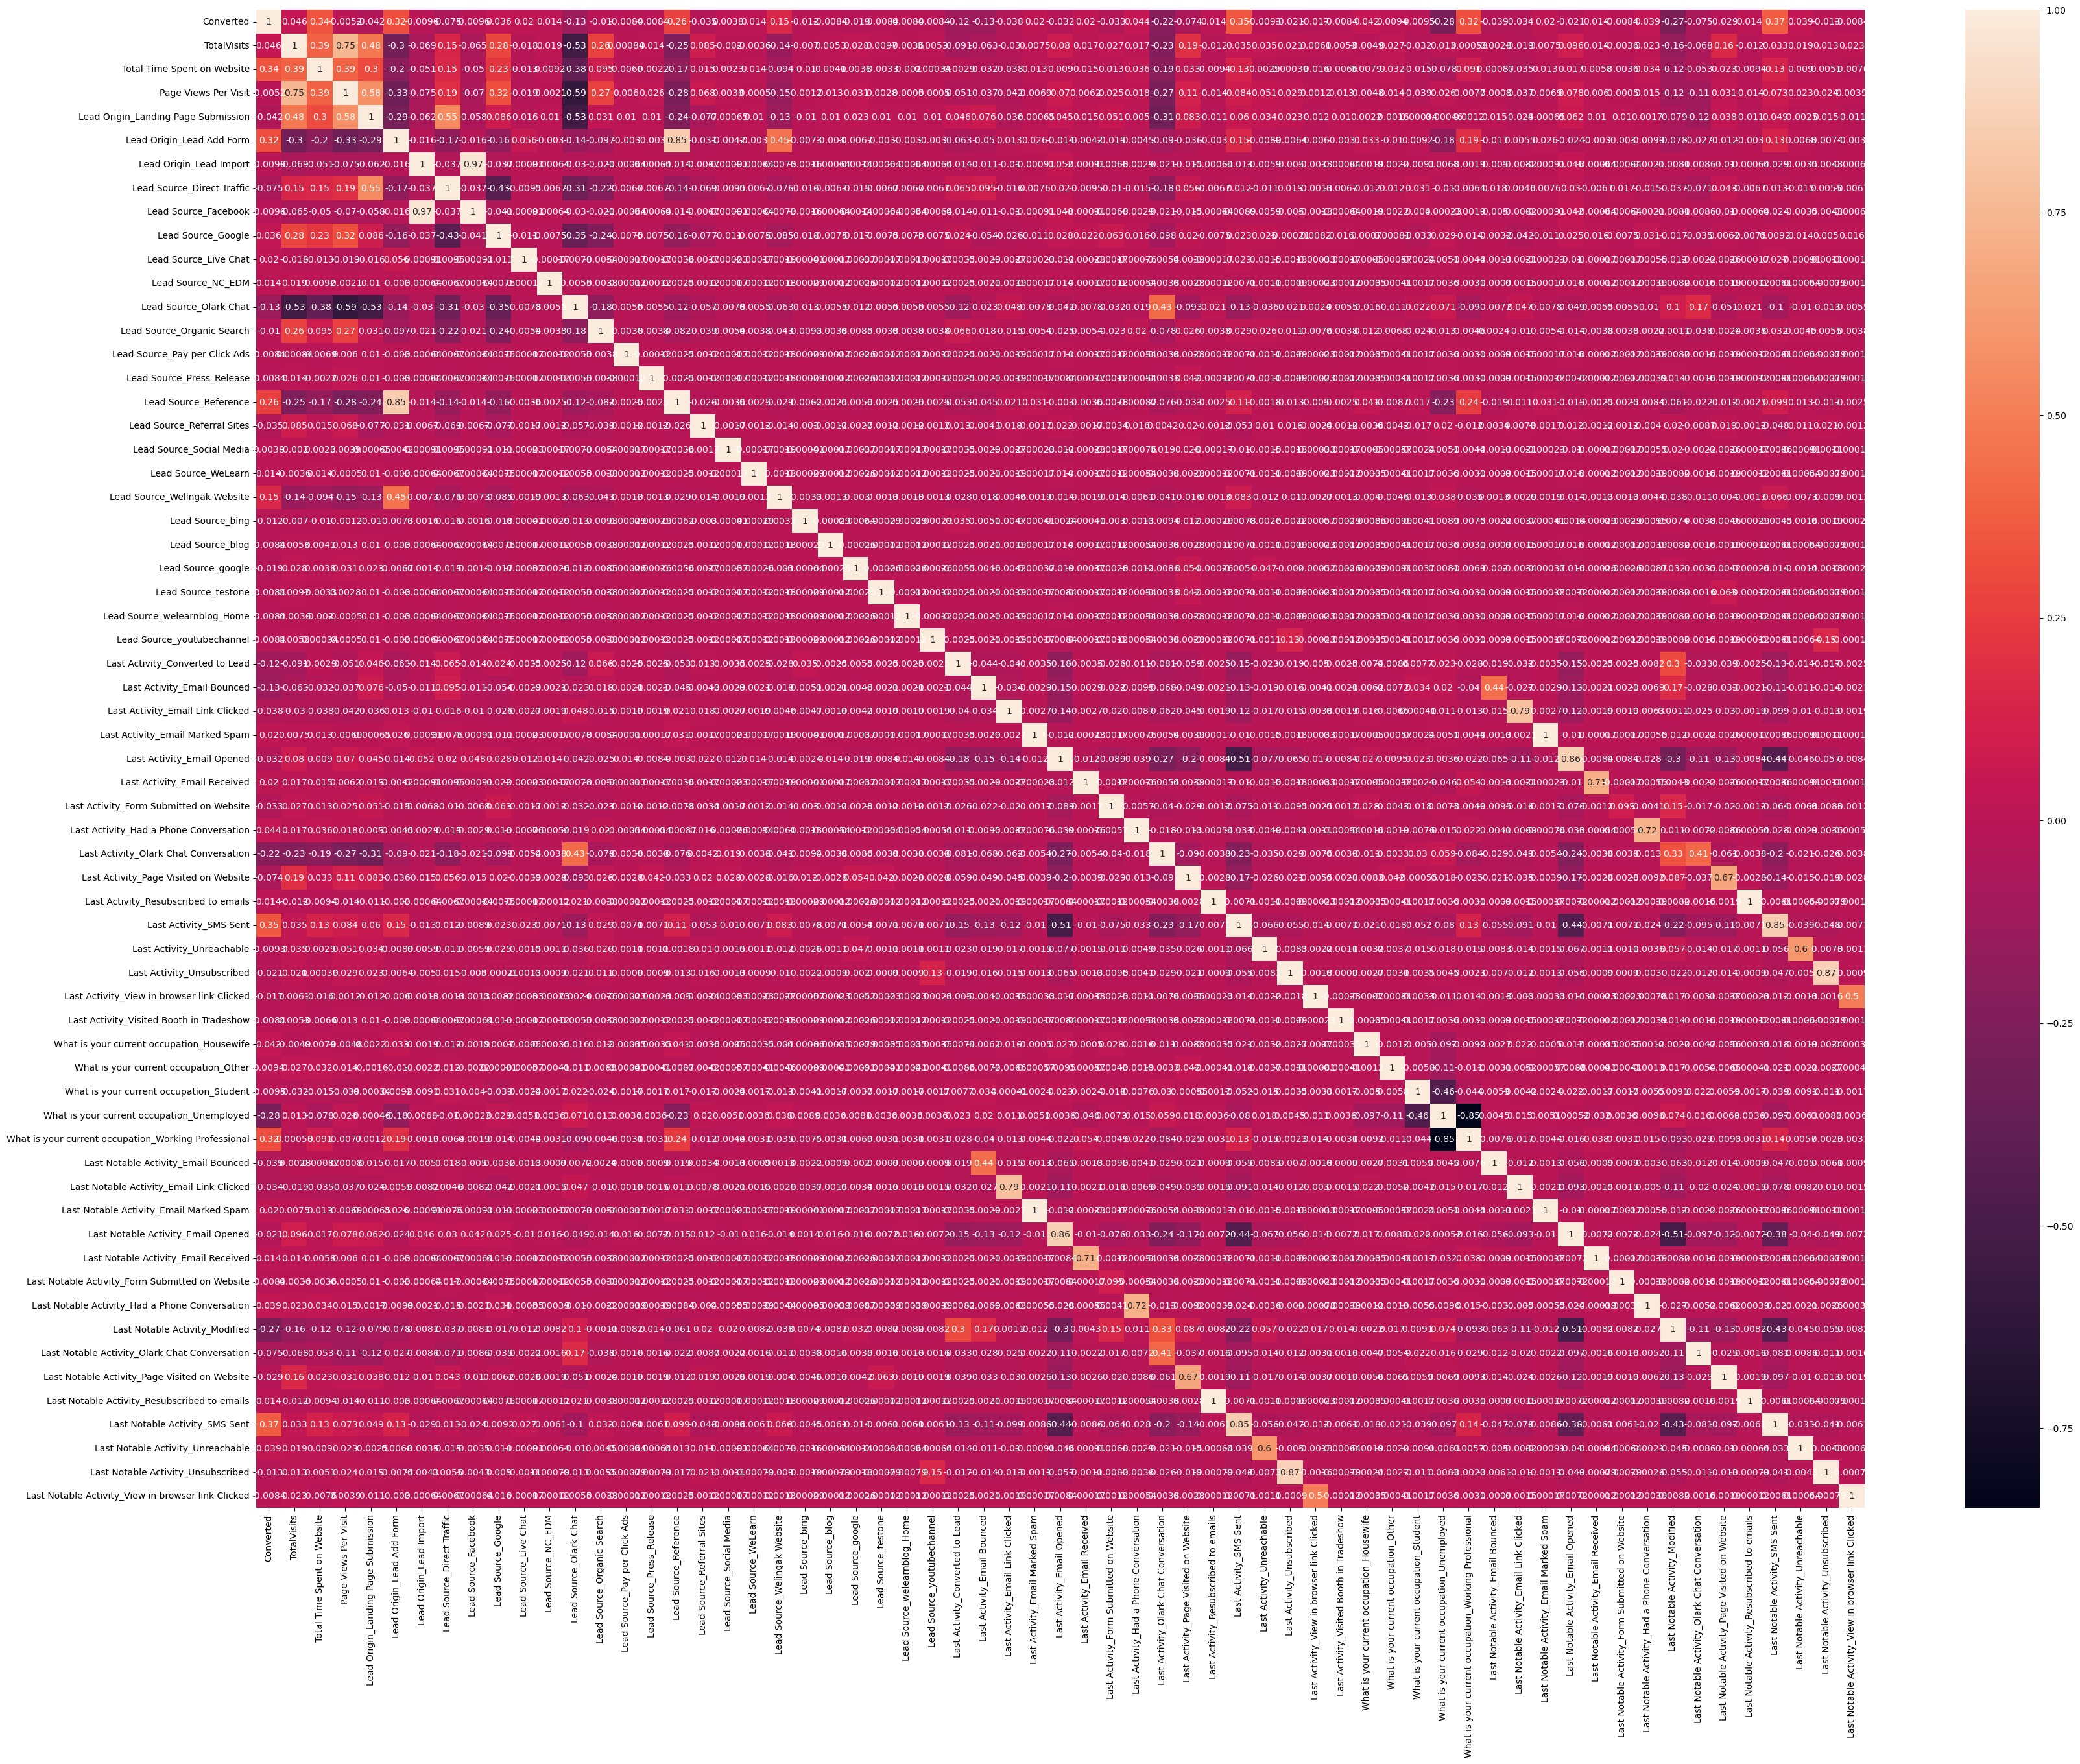

In [85]:
# check the correlation between features
plt.figure(figsize = (40,30))
sns.heatmap(Lead.corr(), annot = True)
plt.show()

In [86]:
Lead.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Rec

## Step 5: Train Test Split 

In [87]:
# import Libraries
from sklearn.model_selection import train_test_split

In [88]:
# Putting feature variable to X
X=Lead.drop('Converted', axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                

In [89]:
# Putting response variable to y
y = Lead['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [91]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
Lead_train, Lead_test = train_test_split(Lead, train_size = 0.7, test_size = 0.3, random_state = 100)
print(Lead_train.shape)
print(Lead_test.shape)

(5979, 63)
(2563, 63)


In [92]:
X_test.shape
y_test.shape

(2563,)

## Step 6: Feature Scalling

In [93]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1384     0.886460                    -0.337463              1.783827   
2019    -1.145025                    -0.860893             -1.254234   
3514    -1.145025                    -0.860893             -1.254234   
5930     0.480163                     0.301267              1.176215   
1409    -0.332431                    -0.857232             -0.039010   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1384                                    1                          0   
2019                                    0                          1   
3514                                    0                          0   
5930                                    0                          0   
1409                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
1384                        0                           0   
2019                        0                           0   
3514                        0                           0   
5930                        0                           0   
1409                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
1384                     0                   1                      0  ...   
2019                     0                   0                      0  ...   
3514                     0                   0                      0  ...   
5930                     0                   0                      0  ...   
1409                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
1384                                                0   
2019                                                0   
3514                                                0   
5930                                                0   
1409                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1384                                               0   
2019                                               0   
3514                                               0   
5930                                               0   
1409                                               0   

      Last Notable Activity_Modified  \
1384                               0   
2019                               0   
3514                               0   
5930                               0   
1409                               1   

      Last Notable Activity_Olark Chat Conversation  \
1384                                              0   
2019                                              0   
3514                                              0   
5930                                              1   
1409                                              0   

      Last Notable Activity_Page Visited on Website  \
1384                                              0   
2019                                              0   
3514                                              0   
5930                                              0   
1409                                              0   

      Last Notable Activity_Resubscribed to emails  \
1384                                             0   
2019                                             0   
3514                                             0   
5930                                             0   
1409                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1384                               0                                  0   
2019                               0                                  0   
3514                               1                                  0   
5930                               0                                  0   
1409                 

In [95]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

37.83657223132756

***Observation***
- the conversion rate is 37.83 percentage almost 38%

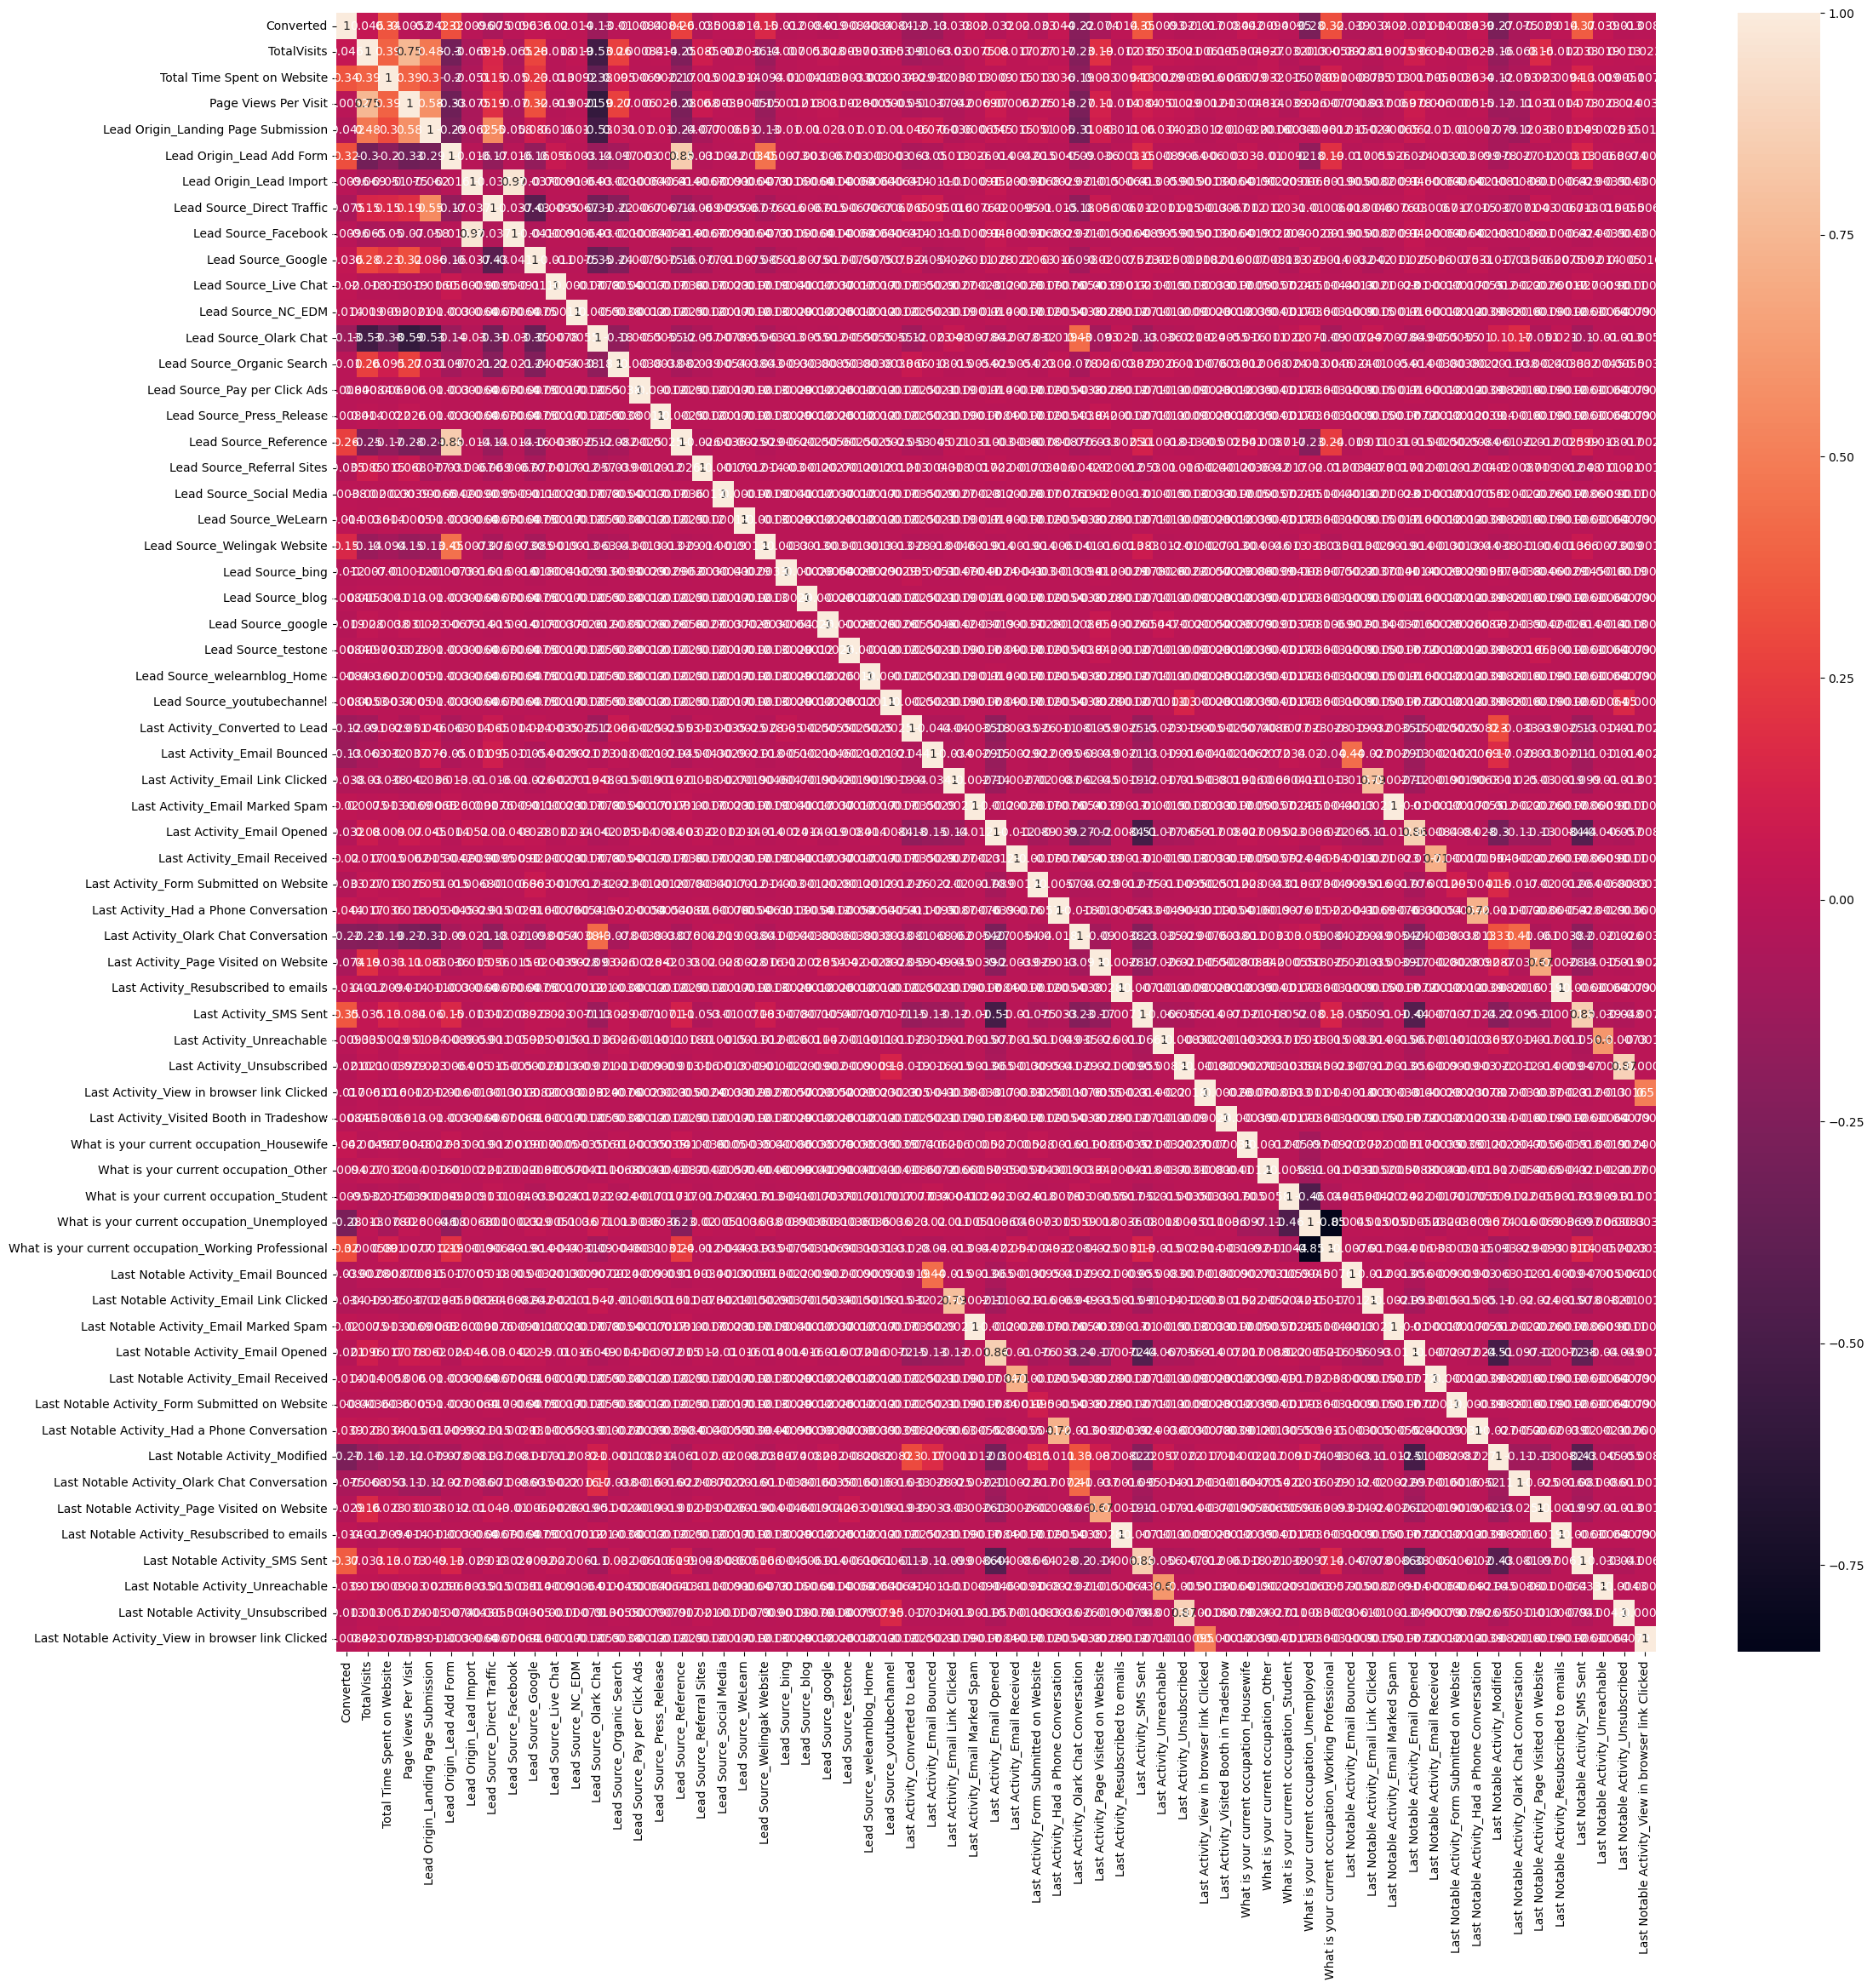

In [96]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,25))        # Size of the figure
sns.heatmap(Lead.corr(),annot = True)
plt.show()

## Step 7: Model Building

Let's start by splitting our data into a training set and a test set.

#### Running First Training Model

In [97]:
import statsmodels.api as sm

In [98]:
# Logistic regression model #1 Regression Model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5922
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.7
Date:                Fri, 12 Jan 2024   Deviance:                       4885.3
Time:                        10:31:05   Pearson chi2:                 6.17e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.5551   7.89e+04      0.000      1.000   -1.55e+05    1.55e+05
TotalVisits                                              0.2669      0.056      4.773      0.000       0.157       0.376
Total Time Spent on Website                              1.0828      0.042     25.867      0.000       1.001       1.165
Page Views Per Visit                                    -0.1930      0.064     -3.020      0.003      -0.318      -0.068
Lead Origin_Landing Page Submission                     -0.1185      0.109     -1.082      0.279      -0.333       0.096
Lead Origin_Lead Add Form                                3.3805      0.778      4.344      0.000       1.855       4.906
Lead Origin_Lead Import                                -21.6593   8.68e+04     -0.000      1.000    -1.7e+05     1.7e+05
Lead Source_Direct Traffic                               0.5647      1.484      0.381      0.704      -2.344       3.474
Lead Source_Facebook                                    23.2486   8.68e+04      0.000      1.000    -1.7e+05     1.7e+05
Lead Source_Google                                       0.8987      1.481      0.607      0.544      -2.003       3.801
Lead Source_Live Chat                                   21.3513   4.64e+04      0.000      1.000    -9.1e+04    9.11e+04
Lead Source_NC_EDM                                      24.5044   8.94e+04      0.000      1.000   -1.75e+05    1.75e+05
Lead Source_Olark Chat                                   1.9297      1.489      1.296      0.195      -0.988       4.848
Lead Source_Organic Search                               0.7470      1.486      0.503      0.615      -2.166       3.660
Lead Source_Pay per Click Ads                          -20.7621   8.25e+04     -0.000      1.000   -1.62e+05    1.62e+05
Lead Source_Press_Release                              -20.3380   7.93e+04     -0.000      1.000   -1.55e+05    1.55e+05
Lead Source_Reference                                    1.3554      1.286      1.054      0.292      -1.166       3.877
Lead Source_Referral Sites                               0.5679      1.524      0.373      0.709      -2.418       3.554
Lead Source_Social Media                                26.9141   9.52e+04      0.000      1.000   -1.87e+05    1.87e+05
Lead Source_WeLearn                                     24.5786   8.96e+04      0.000      1.000   -1.76e+05    1.76e+05
Lead Source_Welingak Website                             3.7593      1.622      2.318      0.020       0.581       6.937
Lead Source_bing                                         1.1545      1.947      0.593      0.553      -2.661       4.970
Lead Source_blog                                       -20

### Step 8: Feature Selection Using RFE

In [99]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [100]:
from sklearn.feature_selection import RFE

In [101]:
# Run RFE model For Feature Selection
rfe = RFE(logreg, n_features_to_select =  15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
        True,  True, False, False, False,  True, False, False])

In [103]:
# Ranking of the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', False, 22),
 ('Lead Source_testone', False, 31),
 ('Lead Source_welearnblog_Home', False, 24),
 

In [104]:
col = X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_U

***Observation***
 - These columns are considered less important or were eliminated during the feature selection process carried out by RFE.

#### Assessing the model with StatsModels

In [106]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.3
Date:                Fri, 12 Jan 2024   Deviance:                       5060.6
Time:                        10:31:11   Pearson chi2:                 6.00e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9788      0.114     -8.562      0.000      -1.203      -0.755
Total Time Spent on Website                              0.9363      0.036     25.984      0.000       0.866       1.007
Lead Origin_Lead Add Form                                3.4123      0.225     15.182      0.000       2.972       3.853
Lead Source_Direct Traffic                              -0.5637      0.079     -7.099      0.000      -0.719      -0.408
Lead Source_Welingak Website                             2.3496      1.034      2.272      0.023       0.322       4.377
Last Activity_Email Bounced                             -1.4710      0.401     -3.664      0.000      -2.258      -0.684
Last Activity_Email Opened                               1.2527      0.154      8.141      0.000       0.951       1.554
Last Activity_Had a Phone Conversation                   1.6573      0.922      1.797      0.072      -0.150       3.465
Last Activity_SMS Sent                                   1.4483      0.114     12.700      0.000       1.225       1.672
What is your current occupation_Housewife               22.9488   2.39e+04      0.001      0.999   -4.69e+04     4.7e+04
What is your current occupation_Working Professional     2.8222      0.194     14.543      0.000       2.442       3.203
Last Notable Activity_Email Opened                      -1.1256      0.176     -6.382      0.000      -1.471      -0.780
Last Notable Activity_Had a Phone Conversation          20.8798   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
Last Notable Activity_Modified                          -1.2027      0.111    -10.813      0.000      -1.421      -0.985
Last Notable Activity_Olark Chat Conversation           -1.2228      0.350     -3.498      0.000      -1.908      -0.538
Last Notable Activity_Unreachable                        2.0384      0.702      2.905      0.004       0.663       3.414
========================================================================================================================
"""

In [107]:
#Dropping column with high p-value
col = col.drop(['Last Notable Activity_Had a Phone Conversation'],1)

In [108]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [109]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.6
Date:                Fri, 12 Jan 2024   Deviance:                       5063.1
Time:                        10:31:11   Pearson chi2:                 6.00e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3840
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9713      0.114     -8.509      0.000      -1.195      -0.748
Total Time Spent on Website                              0.9365      0.036     25.990      0.000       0.866       1.007
Lead Origin_Lead Add Form                                3.4097      0.225     15.168      0.000       2.969       3.850
Lead Source_Direct Traffic                              -0.5656      0.079     -7.122      0.000      -0.721      -0.410
Lead Source_Welingak Website                             2.3520      1.034      2.274      0.023       0.325       4.379
Last Activity_Email Bounced                             -1.4723      0.402     -3.666      0.000      -2.259      -0.685
Last Activity_Email Opened                               1.2563      0.154      8.163      0.000       0.955       1.558
Last Activity_Had a Phone Conversation                   2.3957      0.752      3.186      0.001       0.922       3.870
Last Activity_SMS Sent                                   1.4436      0.114     12.666      0.000       1.220       1.667
What is your current occupation_Housewife               21.9482   1.45e+04      0.002      0.999   -2.84e+04    2.85e+04
What is your current occupation_Working Professional     2.8210      0.194     14.531      0.000       2.441       3.201
Last Notable Activity_Email Opened                      -1.1361      0.176     -6.448      0.000      -1.481      -0.791
Last Notable Activity_Modified                          -1.2132      0.111    -10.933      0.000      -1.431      -0.996
Last Notable Activity_Olark Chat Conversation           -1.2303      0.349     -3.520      0.000      -1.915      -0.545
Last Notable Activity_Unreachable                        2.0313      0.702      2.895      0.004       0.656       3.407
========================================================================================================================
"""

 - Now 'What is your current occupation_Housewife' this feature is having p-Value>0.05%, hence need to be dropped

In [110]:
#Dropping column with high p-value
col = col.drop(['What is your current occupation_Housewife'],1)

In [111]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [112]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.1
Date:                Fri, 12 Jan 2024   Deviance:                       5068.1
Time:                        10:31:11   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3835
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9704      0.114     -8.502      0.000      -1.194      -0.747
Total Time Spent on Website                              0.9368      0.036     26.018      0.000       0.866       1.007
Lead Origin_Lead Add Form                                3.4074      0.225     15.158      0.000       2.967       3.848
Lead Source_Direct Traffic                              -0.5682      0.079     -7.156      0.000      -0.724      -0.413
Lead Source_Welingak Website                             2.3522      1.034      2.274      0.023       0.325       4.379
Last Activity_Email Bounced                             -1.4721      0.402     -3.666      0.000      -2.259      -0.685
Last Activity_Email Opened                               1.2564      0.154      8.164      0.000       0.955       1.558
Last Activity_Had a Phone Conversation                   2.3955      0.752      3.185      0.001       0.921       3.870
Last Activity_SMS Sent                                   1.4438      0.114     12.667      0.000       1.220       1.667
What is your current occupation_Working Professional     2.8193      0.194     14.522      0.000       2.439       3.200
Last Notable Activity_Email Opened                      -1.1316      0.176     -6.423      0.000      -1.477      -0.786
Last Notable Activity_Modified                          -1.2135      0.111    -10.935      0.000      -1.431      -0.996
Last Notable Activity_Olark Chat Conversation           -1.2310      0.350     -3.522      0.000      -1.916      -0.546
Last Notable Activity_Unreachable                        2.0310      0.702      2.894      0.004       0.656       3.406
========================================================================================================================
"""

In [113]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1384    0.238361
2019    0.852627
3514    0.417492
5930    0.127957
1409    0.108007
1484    0.208792
4711    0.257207
9061    0.682096
3233    0.977960
7797    0.047073
dtype: float64

In [114]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23836068, 0.85262749, 0.41749221, 0.12795714, 0.10800733,
       0.20879216, 0.25720731, 0.68209552, 0.97795992, 0.04707339])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.238361         1384
1          1        0.852627         2019
2          1        0.417492         3514
3          0        0.127957         5930
4          0        0.108007         1409

##### Creating new column 'predicted' with 1 if Converted_Prob  > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.238361         1384          0
1          1        0.852627         2019          1
2          1        0.417492         3514          0
3          0        0.127957         5930          0
4          0        0.108007         1409          0

In [117]:
from sklearn import metrics

In [118]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3264  423]
 [ 769 1523]]


# Predicted           Converted_Prob        Converted
# Actual
# Converted_Prob        3264                             423
# Converted                   769                             1523

In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8006355577855828


***Observation***
- The overall accuracy is 80%

### Checking VIFs

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                               const  11.00
10                 Last Notable Activity_Email Opened   6.02
6                          Last Activity_Email Opened   4.45
11                     Last Notable Activity_Modified   2.42
8                              Last Activity_SMS Sent   2.31
2                           Lead Origin_Lead Add Form   1.45
4                        Lead Source_Welingak Website   1.28
12      Last Notable Activity_Olark Chat Conversation   1.20
1                         Total Time Spent on Website   1.13
5                         Last Activity_Email Bounced   1.09
9   What is your current occupation_Working Profes...   1.09
3                          Lead Source_Direct Traffic   1.07
13                  Last Notable Activity_Unreachable   1.03
7              Last Activity_Had a Phone Conversation   1.01

***Obervation***
- Based on the VIF values provided, the “Last Notable Activity_Email Opened” feature has a VIF of 6.02, which indicates a high degree of multicollinearity with other predictor variables in the model. 
- The “Last Activity_Email Opened” feature has a VIF of 4.45, which indicates moderate correlation. 
- The remaining features have VIF values less than 3, indicating no or low correlation with other predictor variables in the model 1.
- Hence we can consider dropping the Last Notable Activity_Email Opened column.

In [122]:
X_train_new = X_train_sm.drop(["Last Notable Activity_Email Opened"], axis=1)

In [123]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                               const  8.52
6                          Last Activity_Email Opened  2.12
8                              Last Activity_SMS Sent  2.06
10                     Last Notable Activity_Modified  1.52
2                           Lead Origin_Lead Add Form  1.45
4                        Lead Source_Welingak Website  1.28
11      Last Notable Activity_Olark Chat Conversation  1.15
1                         Total Time Spent on Website  1.12
5                         Last Activity_Email Bounced  1.09
9   What is your current occupation_Working Profes...  1.09
3                          Lead Source_Direct Traffic  1.07
12                  Last Notable Activity_Unreachable  1.02
7              Last Activity_Had a Phone Conversation  1.01

***Observation***
- All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [124]:
#BUILDING MODEL #4

X_train_new = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.1
Date:                Fri, 12 Jan 2024   Deviance:                       5068.1
Time:                        10:31:12   Pearson chi2:                 6.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3835
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9704      0.114     -8.502      0.000      -1.194      -0.747
Total Time Spent on Website                              0.9368      0.036     26.018      0.000       0.866       1.007
Lead Origin_Lead Add Form                                3.4074      0.225     15.158      0.000       2.967       3.848
Lead Source_Direct Traffic                              -0.5682      0.079     -7.156      0.000      -0.724      -0.413
Lead Source_Welingak Website                             2.3522      1.034      2.274      0.023       0.325       4.379
Last Activity_Email Bounced                             -1.4721      0.402     -3.666      0.000      -2.259      -0.685
Last Activity_Email Opened                               1.2564      0.154      8.164      0.000       0.955       1.558
Last Activity_Had a Phone Conversation                   2.3955      0.752      3.185      0.001       0.921       3.870
Last Activity_SMS Sent                                   1.4438      0.114     12.667      0.000       1.220       1.667
What is your current occupation_Working Professional     2.8193      0.194     14.522      0.000       2.439       3.200
Last Notable Activity_Email Opened                      -1.1316      0.176     -6.423      0.000      -1.477      -0.786
Last Notable Activity_Modified                          -1.2135      0.111    -10.935      0.000      -1.431      -0.996
Last Notable Activity_Olark Chat Conversation           -1.2310      0.350     -3.522      0.000      -1.916      -0.546
Last Notable Activity_Unreachable                        2.0310      0.702      2.894      0.004       0.656       3.406
========================================================================================================================
"""

***Obsevation***
 - the p-values for all features are less than 0.05 which mean that the model is significant.

In [125]:
y_train_pred = res.predict(X_train_new).values.reshape(-1)
y_train_pred[:10]

array([0.23836068, 0.85262749, 0.41749221, 0.12795714, 0.10800733,
       0.20879216, 0.25720731, 0.68209552, 0.97795992, 0.04707339])

In [126]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.238361         1384          0
1          1        0.852627         2019          1
2          1        0.417492         3514          0
3          0        0.127957         5930          0
4          0        0.108007         1409          0

In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8006355577855828


***Observation***
- So overall the accuracy hasn't dropped much.

### Let's take a look at the confusion matrix again 


In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3264,  423],
       [ 769, 1523]], dtype=int64)

# Predicted           Converted_Prob        Converted
# Actual
# Converted_Prob        3264                             423
# Converted                   769                             1523

### Correlation

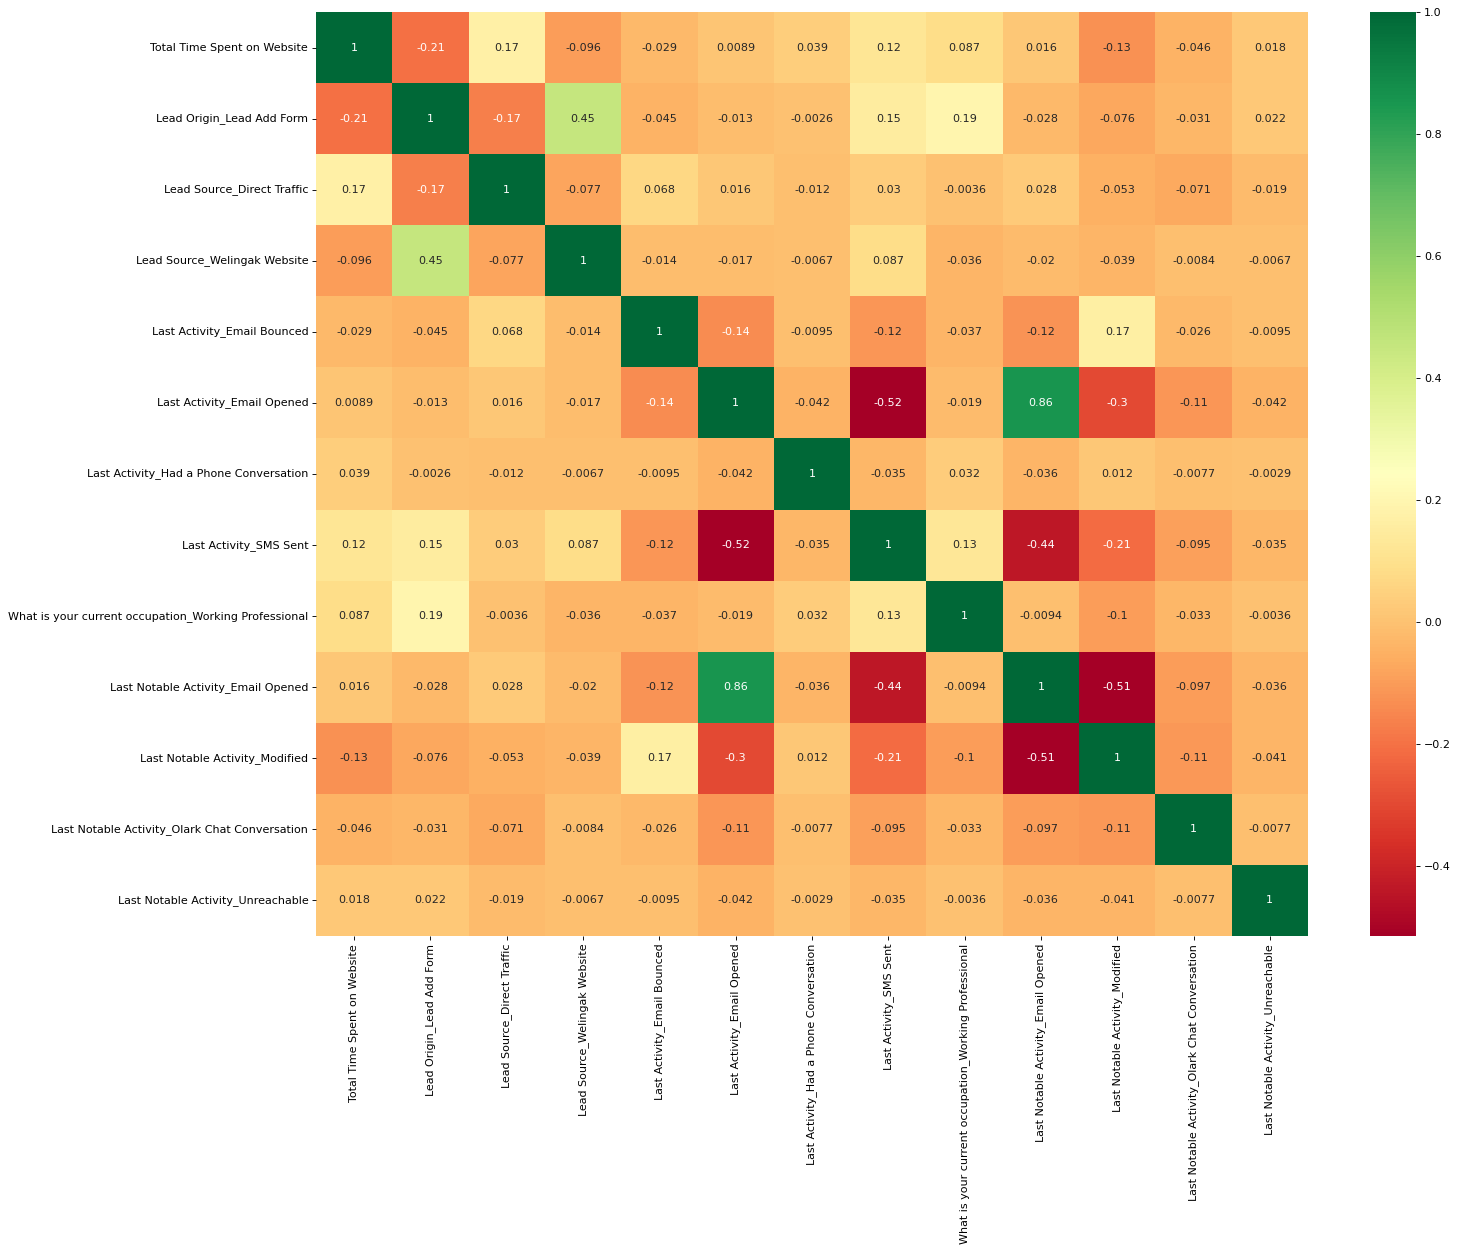

In [187]:
plt.figure(figsize=(20,15), dpi=80)

sns.heatmap(X_train[col].corr(), annot=True, cmap="RdYlGn")

plt.show()

In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8006355577855828

***Observation***
 - the accuracy is 80%

## Metrics beyond simply accuracy

In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6644851657940664

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8852725793327909

In [134]:
# Calculate false postive rate - predicting Converted when customer does not Convert
print(FP/ float(TN+FP))

0.11472742066720912


In [135]:
# positive predictive value 
print (TP / float(TP+FP))

0.7826310380267215


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8093230845524424


### Step 9: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

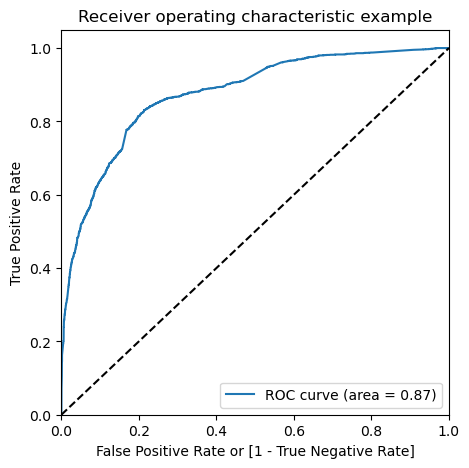

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.238361         1384          0    1    1    1    0    0   
1          1        0.852627         2019          1    1    1    1    1    1   
2          1        0.417492         3514          0    1    1    1    1    1   
3          0        0.127957         5930          0    1    1    0    0    0   
4          0        0.108007         1409          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383342  1.000000  0.000000
0.1   0.1  0.581368  0.979930  0.333605
0.2   0.2  0.733233  0.884817  0.639002
0.3   0.3  0.797792  0.841623  0.770545
0.4   0.4  0.808664  0.783595  0.824247
0.5   0.5  0.800636  0.664485  0.885273
0.6   0.6  0.791437  0.578970  0.923515
0.7   0.7  0.779729  0.502182  0.952265
0.8   0.8  0.759826  0.416667  0.973149
0.9   0.9  0.711992  0.260908  0.992406


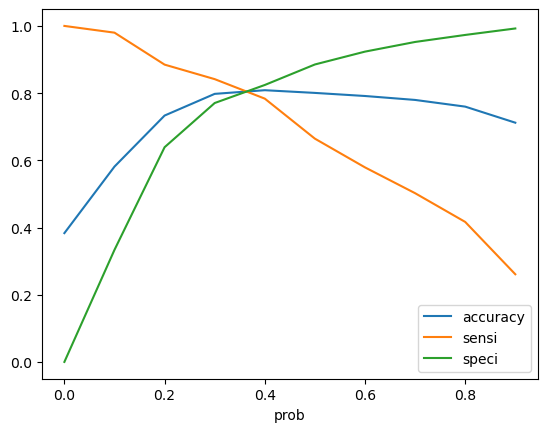

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.238361         1384          0    1    1    1    0    0   
1          1        0.852627         2019          1    1    1    1    1    1   
2          1        0.417492         3514          0    1    1    1    1    1   
3          0        0.127957         5930          0    1    1    0    0    0   
4          0        0.108007         1409          0    1    1    0    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    0                1  
2    0    0    0    0    0                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7977922729553437

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2841,  846],
       [ 363, 1929]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8416230366492147

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.7705451586655818

In [149]:
# Calculate false postive rate - predicting Converted when customer does not Convert
print(FP/ float(TN+FP))

0.22945484133441824


In [150]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6951351351351351


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8867041198501873


## Precision and Recall

### Looking at the confusion matrix again

In [152]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3264,  423],
       [ 769, 1523]], dtype=int64)

##### Precision
TP / TP + FP

In [153]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7826310380267215

##### Recall
TP / TP + FN

In [154]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6644851657940664

#### Using sklearn utilities for the same

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
?precision_score

In [157]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7826310380267215

In [158]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6644851657940664

### Precision and recall tradeoff

In [159]:
from sklearn.metrics import precision_recall_curve

In [160]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 5974    0
 5975    0
 5976    0
 5977    0
 5978    1
 Name: Converted, Length: 5979, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 5974    0
 5975    0
 5976    0
 5977    0
 5978    1
 Name: predicted, Length: 5979, dtype: int64)

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

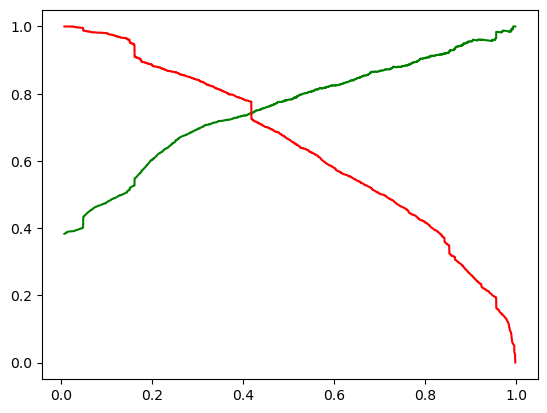

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the X_test set

In [163]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7191    -0.332431                     1.165108             -0.039010   
1008     1.699055                    -0.582706              0.872409   
3494     2.917946                     1.203542              1.783827   
3298     0.073866                     0.021250              0.568603   
5646    -1.145025                    -0.860893             -1.254234   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7191                                    1                          0   
1008                                    1                          0   
3494                                    1                          0   
3298                                    1                          0   
5646                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
7191                        0                           1   
1008                        0                           0   
3494                        0                           1   
3298                        0                           1   
5646                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
7191                     0                   0                      0  ...   
1008                     0                   1                      0  ...   
3494                     0                   0                      0  ...   
3298                     0                   0                      0  ...   
5646                     0                   0                      0  ...   

      Last Notable Activity_Form Submitted on Website  \
7191                                                0   
1008                                                0   
3494                                                0   
3298                                                0   
5646                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7191                                               0   
1008                                               0   
3494                                               0   
3298                                               0   
5646                                               0   

      Last Notable Activity_Modified  \
7191                               0   
1008                               0   
3494                               0   
3298                               0   
5646                               0   

      Last Notable Activity_Olark Chat Conversation  \
7191                                              0   
1008                                              0   
3494                                              0   
3298                                              0   
5646                                              0   

      Last Notable Activity_Page Visited on Website  \
7191                                              0   
1008                                              0   
3494                                              0   
3298                                              0   
5646                                              0   

      Last Notable Activity_Resubscribed to emails  \
7191                                             0   
1008                                             0   
3494                                             0   
3298                                             0   
5646                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7191                               0                                  0   
1008                               0                                  0   
3494                               1                                  0   
3298                               1                                  0   
5646                 

In [164]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
7191                     1.165108                          0   
1008                    -0.582706                          0   
3494                     1.203542                          0   
3298                     0.021250                          0   
5646                    -0.860893                          1   

      Lead Source_Direct Traffic  Lead Source_Welingak Website  \
7191                           1                             0   
1008                           0                             0   
3494                           1                             0   
3298                           1                             0   
5646                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
7191                            0                           1   
1008                            0                           1   
3494                            0                           0   
3298                            0                           0   
5646                            0                           1   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
7191                                       0                       0   
1008                                       0                       0   
3494                                       0                       1   
3298                                       0                       1   
5646                                       0                       0   

      What is your current occupation_Working Professional  \
7191                                                  1      
1008                                                  0      
3494                                                  0      
3298                                                  0      
5646                                                  0      

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7191                                   1                               0   
1008                                   1                               0   
3494                                   0                               0   
3298                                   0                               0   
5646                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
7191                                              0   
1008                                              0   
3494                                              0   
3298                                              0   
5646                                              0   

      Last Notable Activity_Unreachable  
7191                                  0  
1008                                  0  
3494                                  0  
3298                                  0  
5646                                  0

In [165]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the y_test set

In [166]:
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

7191    0.923931
1008    0.199180
3494    0.737436
3298    0.481293
5646    0.852627
4485    0.785859
5577    0.923167
4165    0.613592
4539    0.417492
5568    0.148427
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred_1.head()

0
7191  0.923931
1008  0.199180
3494  0.737436
3298  0.481293
5646  0.852627

In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [172]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         7191  0.923931
1          1         1008  0.199180
2          1         3494  0.737436
3          1         3298  0.481293
4          1         5646  0.852627

In [175]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [176]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [177]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         7191          0        0.923931          92
1         1008          1        0.199180          20
2         3494          1        0.737436          74
3         3298          1        0.481293          48
4         5646          1        0.852627          85

In [178]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [179]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         7191          0        0.923931          92                1
1         1008          1        0.199180          20                0
2         3494          1        0.737436          74                1
3         3298          1        0.481293          48                1
4         5646          1        0.852627          85                1

In [180]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7850175575497463

In [181]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1224,  399],
       [ 152,  788]], dtype=int64)

In [182]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [183]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8382978723404255

In [184]:
# Let us calculate specificity
TN / float(TN+FP)

0.7541589648798521

In [185]:
# get Prcision Score on y_pred
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6638584667228307

In [186]:
# get recall score on y_pred
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8382978723404255

## Determining Feature Importance

In [188]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             0.94
Lead Origin_Lead Add Form                               3.41
Lead Source_Direct Traffic                             -0.57
Lead Source_Welingak Website                            2.35
Last Activity_Email Bounced                            -1.47
Last Activity_Email Opened                              1.26
Last Activity_Had a Phone Conversation                  2.40
Last Activity_SMS Sent                                  1.44
What is your current occupation_Working Professional    2.82
Last Notable Activity_Email Opened                     -1.13
Last Notable Activity_Modified                         -1.21
Last Notable Activity_Olark Chat Conversation          -1.23
Last Notable Activity_Unreachable                       2.03
dtype: float64

In [189]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             27.49
Lead Origin_Lead Add Form                              100.00
Lead Source_Direct Traffic                             -16.67
Lead Source_Welingak Website                            69.03
Last Activity_Email Bounced                            -43.20
Last Activity_Email Opened                              36.87
Last Activity_Had a Phone Conversation                  70.30
Last Activity_SMS Sent                                  42.37
What is your current occupation_Working Professional    82.74
Last Notable Activity_Email Opened                     -33.21
Last Notable Activity_Modified                         -35.61
Last Notable Activity_Olark Chat Conversation          -36.13
Last Notable Activity_Unreachable                       59.61
dtype: float64

In [190]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                              4
Lead Origin_Lead Add Form                               11
Lead Source_Direct Traffic                              10
Lead Source_Welingak Website                             9
Last Activity_Email Bounced                              2
Last Activity_Email Opened                               0
Last Activity_Had a Phone Conversation                   5
Last Activity_SMS Sent                                   7
What is your current occupation_Working Professional    12
Last Notable Activity_Email Opened                       3
Last Notable Activity_Modified                           6
Last Notable Activity_Olark Chat Conversation            8
Last Notable Activity_Unreachable                        1
dtype: int64

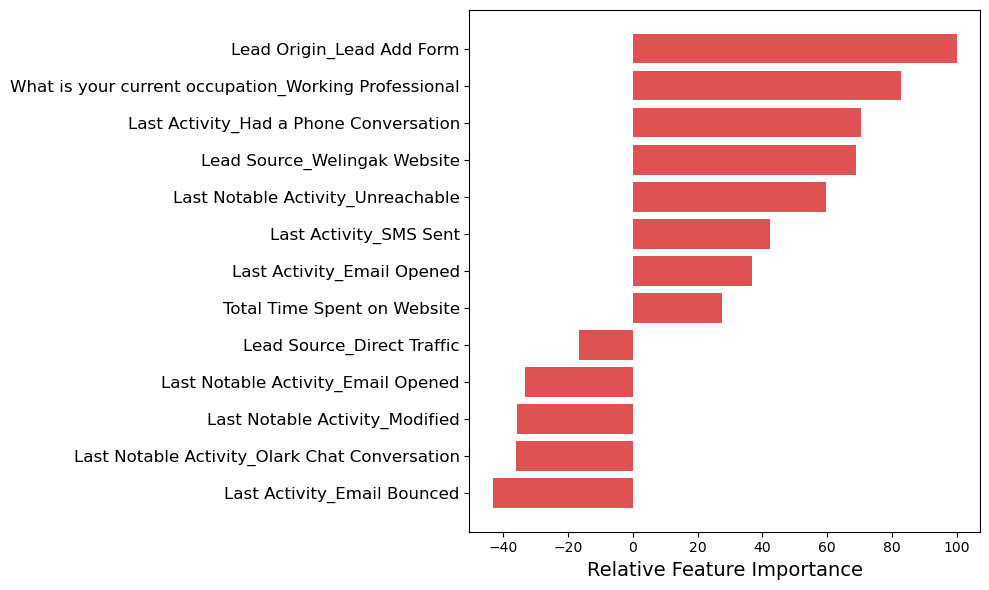

In [191]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [192]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
1                          Lead Origin_Lead Add Form 100.00
8  What is your current occupation_Working Profes...  82.74
6             Last Activity_Had a Phone Conversation  70.30

## Conclusion

***p-Value*** 
 - All variables have p-value < 0.05.In statistical hypothesis testing, a p-value is used to determine the significance of a variable in a model. A p-value less than 0.05 generally indicates that the variable is statistically significant. In other words, there is evidence to reject the null hypothesis that the variable has no effect.
 
***VIF***
- All the features have very low VIF values. Variance Inflation Factor (VIF) is a measure of multicollinearity among predictor variables in a regression model. Low VIF values indicate that there is minimal correlation among the independent variables, reducing the risk of multicollinearity. This is important because multicollinearity can lead to unstable and unreliable coefficient estimates. 

***Heatmap***
- Heat map confirmation:

- The heatmap is likely a visualization of the correlation matrix between different variables. If there are no strong correlations (high values) between variables, it supports the claim of low multicollinearity.

***Accuracy***
 - The overall accuracy of train data 80% and test data 78.50% at a probability threshold of 0.3 on the test dataset is also very acceptable.
 - These values suggest that your model is performing reasonably well. However, it's important to consider other metrics like precision, recall, and F1 score to have a more comprehensive evaluation.
 
***Probability threshold of 0.3***
- In binary classification problems, you need to set a threshold to decide when to classify an observation as positive or negative. A lower threshold (such as 0.3 in your case) might result in more instances being classified as positive. This can affect metrics like sensitivity, specificity, precision, and recall.


***In summary, this suggest that the model has statistically significant variables, low multicollinearity, and performs reasonably well in terms of accuracy. However, it's always good to consider a combination of metrics and thoroughly validate the model's performance to ensure its robustness. Additionally, understanding the context of the problem and potential business implications is crucial for a comprehensive evaluation.***

***The conversion probability of a lead increases with increase in values of the following features in descending order:***
 - Lead Origin_Lead Add Form
 - What is your current occupation_Working Professional
 - Last Activity_Had a Phone Conversation
 - Lead Source_Welingak Website
 - Last Notable Activity_Unreachable
 - Last Activity_SMS Sent
 - Last Activity_Email Opened
 - Total Time Spent on Website


***The conversion probability of a lead increases with decrease in values of the following features in descending order:***
 - Lead Source_Direct Traffic
 - Last Notable Activity_Email Opened
 - Last Notable Activity_Modified
 - Last Notable Activity_Olark Chat Conversation
 - Last Activity_Email Bounced